In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

Loading Dataset

In [88]:
df = pd.read_csv("../data/Piece_Dimension.csv")
print(df.head())

   Item_No  Length  Width  Height Operator
0        1  102.67  49.53   19.69     Op-1
1        2  102.50  51.42   19.63     Op-1
2        3   95.37  52.25   21.51     Op-1
3        4   94.77  49.24   18.60     Op-1
4        5  104.26  47.90   19.46     Op-1


In [89]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Item_No   500 non-null    int64  
 1   Length    500 non-null    float64
 2   Width     500 non-null    float64
 3   Height    500 non-null    float64
 4   Operator  500 non-null    str    
dtypes: float64(3), int64(1), str(1)
memory usage: 19.7 KB


In [90]:
df.describe()

,Item_No,Length,Width,Height
count,500.000000,500.000000,500.00000,500.000000
mean,250.500000,99.769140,49.93288,20.293220
std,144.481833,4.107471,2.11382,1.051718
min,1.000000,87.520000,42.74000,17.370000
25%,125.750000,96.835000,48.34000,19.475000
50%,250.500000,99.565000,49.82500,20.310000
75%,375.250000,102.035000,51.46250,21.142500
max,500.000000,116.600000,58.26000,23.390000


Composite Quality

In [91]:

df["quality"] = df[["Length", "Width", "Height"]].mean(axis=1)

data = df["quality"]

Basic Statistics 

In [92]:

mean = data.mean()
variance = data.var()
std = data.std()

print("\n--- Basic Statistics ---")
print("Mean:", mean)
print("Variance:", variance)
print("Standard Deviation:", std)


--- Basic Statistics ---
Mean: 56.66508
Variance: 3.0521565956802497
Standard Deviation: 1.7470422420995577


 Normal distribution data

In [93]:
normal_simulated = np.random.normal(data.mean(), data.std(), 500)

Introducing Skewed Batch 

In [94]:
skewed_batch = np.random.normal(data.mean()-5, data.std()*2, 30)

Distributions Comparision

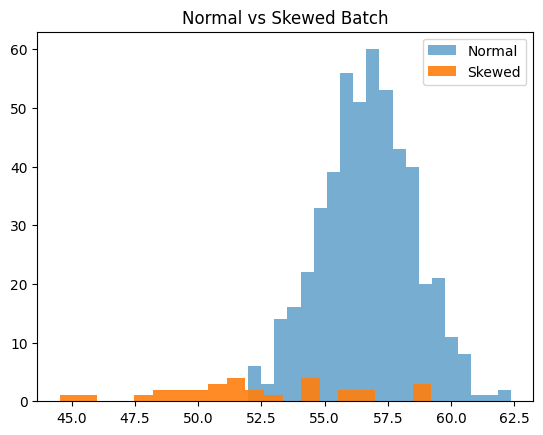

In [95]:
plt.hist(normal_simulated, bins=20, alpha=0.6, label="Normal")
plt.hist(skewed_batch, bins=20, alpha=0.9, label="Skewed")
plt.legend()
plt.title("Normal vs Skewed Batch")
plt.show()

Computation of Mean,Variance and Standard Deviation

In [96]:
combined = np.concatenate([data, skewed_batch])

mean = combined.mean()
var = combined.var()
std = combined.std()

print("\nMean:", mean)
print("Variance:", var)
print("Std:", std)


Mean: 56.415852225016295
Variance: 4.678738172840073
Std: 2.163039105712163


Z-Score Defect Detection 

Defective products: 16


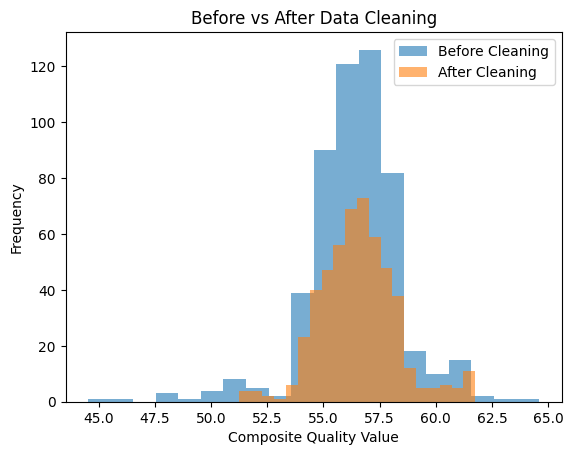

In [97]:
z_scores = (combined - mean) / std

defects = combined[np.abs(z_scores) > 2.5]

print("Defective products:", len(defects))

cleaned = combined[np.abs(z_scores) <= 2.5]

plt.hist(combined, bins=20, alpha=0.6, label="Before Cleaning")
plt.hist(cleaned, bins=20, alpha=0.6, label="After Cleaning")

plt.legend()
plt.xlabel("Composite Quality Value")
plt.ylabel("Frequency")
plt.title("Before vs After Data Cleaning")

plt.show()

Probability of product below threshold

In [98]:
threshold = 95
prob = norm.cdf(threshold, mean, std)

print("Probability product below threshold:", prob,"%")

Probability product below threshold: 1.0 %


SQL Storage 

In [99]:
import sqlite3

conn = sqlite3.connect("quality.db")
cur = conn.cursor()

cur.execute("""
CREATE TABLE IF NOT EXISTS quality(
id INTEGER PRIMARY KEY,
value REAL,
z REAL,
defect INTEGER)
""")


cur.execute("DELETE FROM quality")
conn.commit()

for i,v in enumerate(combined):
    z=(v-mean)/std
    d=1 if abs(z)>2.5 else 0
    cur.execute("INSERT INTO quality VALUES(?,?,?,?)",(i,float(v),float(z),d))

conn.commit()

Defect Percentage

In [100]:
query = """
SELECT ROUND(100.0*SUM(defect)/COUNT(*),2) AS defect_percentage
FROM quality;
"""

result = pd.read_sql(query, conn)

print("Defect Percentage:", result["defect_percentage"][0],"%")

Defect Percentage: 3.02 %


Central Limit Theorem

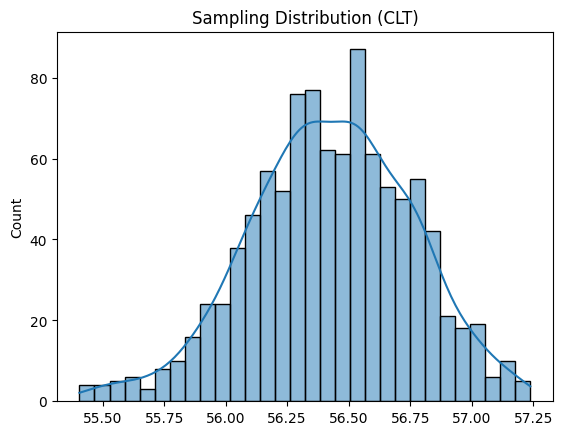

In [101]:
import seaborn as sns
sample_means=[]

for _ in range(1000):
    sample=np.random.choice(combined,40)
    sample_means.append(sample.mean())

sns.histplot(sample_means,bins=30,kde=True)
plt.title("Sampling Distribution (CLT)")
plt.show()

Population vs Sample Distribution

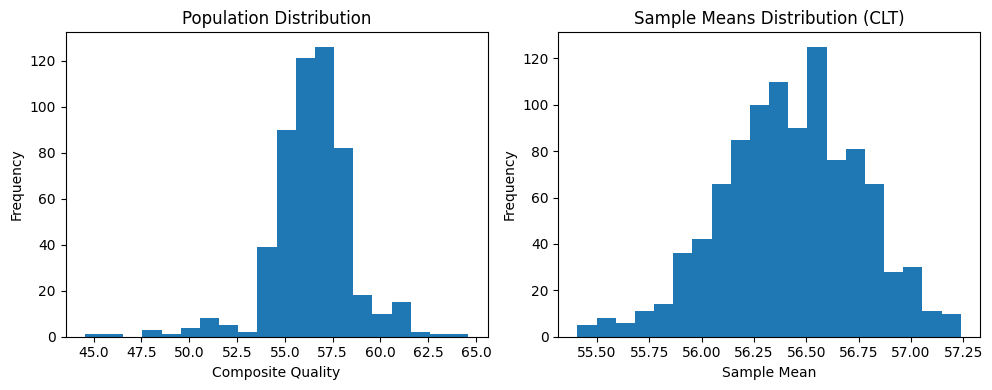

In [102]:

plt.figure(figsize=(10,4))

# Population distribution
plt.subplot(1,2,1)
plt.hist(combined, bins=20)
plt.title("Population Distribution")
plt.xlabel("Composite Quality")
plt.ylabel("Frequency")

# Sample means distribution
plt.subplot(1,2,2)
plt.hist(sample_means, bins=20)
plt.title("Sample Means Distribution (CLT)")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()